# Exercise 1.A

## Importing libraries

In [ ]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline

## Loading data to dataframes

In [318]:
#reading data files

path_to_store_csvfile = "store.csv"
path_to_train_csvfile = "train.csv"

store_df=pd.read_csv(path_to_store_csvfile)
train_df=pd.read_csv(path_to_train_csvfile)

C:\Users\fahad\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3072: DtypeWarning: Columns (7) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


## Merging store and train dataframes which we will use in future tasks

In [319]:
#Merging both the Dataframes into one based on the "Store" ID
df=store_df.merge(train_df,on=["Store"],how="inner")

### A.)Find the store that has the maximum sale recorded. Print the store id, date and the sales on that day?

In [332]:
max_sale = train_df[train_df['Sales']==train_df['Sales'].max()]
results = max_sale[['Store','Date','Sales']].values
print(f"StoreId:{results[0][0]}, Date:{results[0][1]}, Sales:{results[0][2]}")

StoreId:909, Date:2015-06-22, Sales:41551


### B.)Find the store(s) that has/ve the least possible and maximum possible competition distance(s)?

In [339]:
compDis_min = store_df[store_df['CompetitionDistance']==store_df['CompetitionDistance'].min()]
compDis_max = store_df[store_df['CompetitionDistance']==store_df['CompetitionDistance'].max()]


In [352]:
print(f'StoreId:{compDis_min["Store"].item()} has least posible competition distance of {compDis_min["CompetitionDistance"].item()}')

StoreId:516 has least posible competition distance of 20.0


In [355]:
print(f'StoreId:{compDis_max["Store"].item()} has maximum posible competition distance of {compDis_max["CompetitionDistance"].item()}')

StoreId:453 has maximum posible competition distance of 75860.0


### C.)What has been the maximum timeline a store has ran a "Promo" for? Which store was that, and what dates did the promotion covered?

<p>For each Store we will do following tasks: </p><br>
<ul>
    <li>First get rows where Promo was running (Promo = 1).</li>
    <li>Then on the filtered rows, groupby when Promo was not running (Promo != 0).</li>
    <li>Apply cumsum function which will give us <b>different groups</b> where consecutive Promo coloum was 1.</li>
    <li>Now we just have to count each group rows. Group with maxium rows give us maximum timeline when that specific Store ran a Promo.</li>
    <li>Repeat above process and make an list that contain dictionary of count, storeId and store maximum timeline when they ran Promo.</li>
    <li>To get which store ran promo for maximum timeline, sort list on basis of count ascendingly and pop the last index value of list</li>
</ul>

<p>Results show that each store ran promo for maximum timeline of 5 days in different intervals. So I showed each store with the first interval when store ran promo for maximum timeline.</p>

In [374]:
# Sort rows based on date and groupby based on store
ins = df.sort_values('Date',ascending=True).groupby(['Store'])

In [373]:
total_promo = []
s = 0
for group_name, df_data in ins:
    
    max_promo_info = {}
    max_promo_info["count"] = 0
    max_promo_info["StartDate"] = ""
    max_promo_info["EndDate"] = ""
    max_promo_info["StoreId"] = ""    
    
    for k, v in df_data[df_data['Promo'] == 1].groupby((df['Promo'] != 1).cumsum()): 
        
        if v['Store'].count() >= max_promo_info["count"]:
                max_promo_info["count"] = v['Store'].count() #Store count of consecutive days promotion
                max_promo_info["StartDate"] = min(v["Date"]) # get miniimum date in group  as starting date
                max_promo_info["EndDate"] = max(v["Date"]) # get maximum date in group  as ending date
                max_promo_info["StoreId"] = v.iloc[0]["Store"] 
    total_promo.append(max_promo_info) #append each store maximum consecutive days promo info
    
         
consecutive_promo = sorted(total_promo, key=lambda k: k['count']) 
consecutive_promo



[{'count': 5,
  'StartDate': '2013-01-07',
  'EndDate': '2013-01-11',
  'StoreId': 1},
 {'count': 5,
  'StartDate': '2013-01-07',
  'EndDate': '2013-01-11',
  'StoreId': 2},
 {'count': 5,
  'StartDate': '2013-01-07',
  'EndDate': '2013-01-11',
  'StoreId': 3},
 {'count': 5,
  'StartDate': '2013-01-07',
  'EndDate': '2013-01-11',
  'StoreId': 4},
 {'count': 5,
  'StartDate': '2013-01-07',
  'EndDate': '2013-01-11',
  'StoreId': 5},
 {'count': 5,
  'StartDate': '2013-01-07',
  'EndDate': '2013-01-11',
  'StoreId': 6},
 {'count': 5,
  'StartDate': '2013-01-07',
  'EndDate': '2013-01-11',
  'StoreId': 7},
 {'count': 5,
  'StartDate': '2013-01-07',
  'EndDate': '2013-01-11',
  'StoreId': 8},
 {'count': 5,
  'StartDate': '2013-01-07',
  'EndDate': '2013-01-11',
  'StoreId': 9},
 {'count': 5,
  'StartDate': '2013-01-07',
  'EndDate': '2013-01-11',
  'StoreId': 10},
 {'count': 5,
  'StartDate': '2013-01-07',
  'EndDate': '2013-01-11',
  'StoreId': 11},
 {'count': 5,
  'StartDate': '2013-01-07'

### D.)What is the difference in the mean of sales (across all stores) when offering a Promo and not?

In [375]:
mean_sale_with_promo = train_df[train_df['Promo']==1]['Sales'].mean()

print(f"When offering promo, mean of sale is {mean_sale_with_promo}")

When offering promo, mean of sale is 7991.152045969903


In [376]:
mean_sale_without_promo = train_df[train_df['Promo']==0]['Sales'].mean()
print(f"When not offering promo, mean of sale is {mean_sale_without_promo}")

When not offering promo, mean of sale is 4406.050805160786


### E.) Are there any anomalies in the data as in where the store was "Open" but had no sales recorded? or vice versa?

#### Store was "Open" but had no sales recorded!!!

In [377]:
anamoly = train_df[(train_df['Open'] == 1) & (train_df['Sales'] == 0)]

In [379]:
anamoly #This shows that anamoly : Store was opened but not sale recorded exist

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
86825,971,5,2015-05-15,0,0,1,0,0,1
142278,674,4,2015-03-26,0,0,1,0,0,0
196938,699,4,2015-02-05,0,0,1,1,0,0
322053,708,3,2014-10-01,0,0,1,1,0,0
330176,357,1,2014-09-22,0,0,1,0,0,0
340348,227,4,2014-09-11,0,0,1,0,0,0
340860,835,4,2014-09-11,0,0,1,0,0,0
341795,835,3,2014-09-10,0,0,1,0,0,0
346232,548,5,2014-09-05,0,0,1,1,0,1
346734,28,4,2014-09-04,0,0,1,1,0,0


#### Store was "Close" but  sales were recorded!!!

In [380]:
anamoly = train_df[(train_df['Open'] == 0) & (train_df['Sales'] >0)]

In [381]:
anamoly # #This shows that no anamoly exist when store was closed but sale was recorded

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday


### F.) Which store type (’a’,’b’ etc.) has had the most sales?

In [382]:
most_sales = df.groupby(['StoreType']).sum()['Sales']

In [386]:
print(f"Store: {most_sales.idxmax()} has maximum sale of {max(most_sales)} ")

Store: a has maximum sale of 3165334859 


<hr style="border:2px solid gray"> </hr>

## Part B

In [388]:
df1 = df.copy() #copy dataframe to another variable to copy function behaviour


### Doing preprocessing that will help in plotting tasks

In [389]:
# extract year, month, day  from "Date" and add it to dataframe
df1['Year'] = pd.DatetimeIndex(df1['Date']).year
df1['Month'] = pd.DatetimeIndex(df1['Date']).month
df1['Day'] = pd.DatetimeIndex(df1['Date']).day


In [390]:
# sales = df1[['Year','Month','Store','Sales']].groupby(['Year','Month','Store']).mean()
# sales = sales.rename(columns={'Sales':'AvgSales'})
# sales

In [391]:
# sales2 = df1[['Year','Month','StoreType','Sales']].groupby(['Year','Month','StoreType']).mean()
# sales2 = sales2.rename(columns={'Sales':'AvgSales'})
# sales2

### A.) On a monthly basis how do the mean of sales vary (across all stores)? plot these sale

In [396]:
sales = df1[['Month','Sales']].groupby(['Month']).mean()
sales = sales.rename(columns={'Sales':'MonthlySales'})
sales

,MonthlySales
Month,
1,5465.395529
2,5645.253150
3,5784.578871
4,5738.866916
5,5489.639973
6,5760.964375
7,6064.915711
8,5693.016554
9,5570.246033


Text(0, 0.5, 'Mothly Mean Sales')

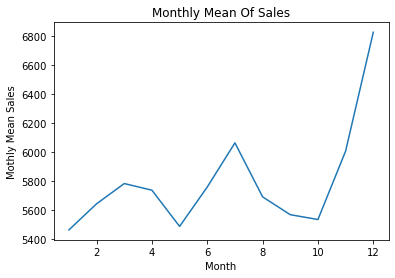

In [400]:
fig = plt.figure()
ax = plt.axes()
ax.plot(sales.index.values,sales["MonthlySales"] );
ax.set_title('Monthly Mean Of Sales')
ax.set_xlabel('Month')
ax.set_ylabel('Mothly Mean Sales')

### B.)On a daily basis how do the mean of sales vary (across all stores)? again, plot these sales

In [401]:
sales_daily = df1[['Day','Sales']].groupby(['Day']).mean()
sales_daily = sales_daily.rename(columns={'Sales':'DailySales'})
sales_daily

,DailySales
Day,
1,4658.450603
2,6973.664895
3,5811.044109
4,6818.008362
5,6357.150246
6,5886.054621
7,6014.050679
8,5665.783784
9,5253.768165


Text(0, 0.5, 'Daily Mean Sales')

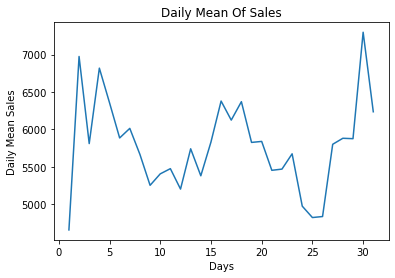

In [402]:
fig = plt.figure()
ax = plt.axes()

ax.plot(sales_daily.index.values,sales_daily["DailySales"] );
ax.set_title('Daily Mean Of Sales')
ax.set_xlabel('Days')
ax.set_ylabel('Daily Mean Sales')

### C.)For the first store id, plot it’s cumulative sales for the first year.

In [408]:
St_1 = df1[(df1["Store"] == 1) & (df1['Year'] == 2013)].sort_values(['Year', 'Month','Day'],ascending=True)
St_1_sales = St_1["Sales"].cumsum()
St_1_sales

941          0
940       5530
939       9857
938      14343
937      19340
        ...   
581    1475926
580    1481585
579    1481585
578    1488778
577    1491140
Name: Sales, Length: 365, dtype: int64

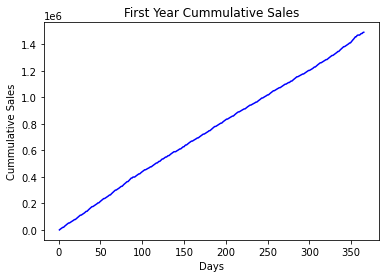

In [409]:
plt.xlabel('Days')
plt.ylabel('Cummulative Sales')
plt.title('First Year Cummulative Sales')
plt.plot( list(range(1, 366)), St_1_sales, c='blue')

### D.)Plot and comment on the following relationships:

#### customers(x-axis) vs. sales(y-axis)

In [412]:
dfs = df1.sort_values(['Year', 'Month','Day'])



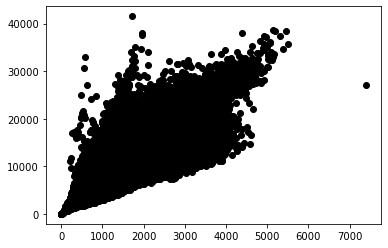

In [413]:
plt.plot(dfs.Customers, dfs.Sales, 'o', color='black');

<p>Above graph shows linear relation between customer and sales. More sales if there are more customers and vice verse</p>

#### competitiondistance(x-axis) vs. sales(y-axis)

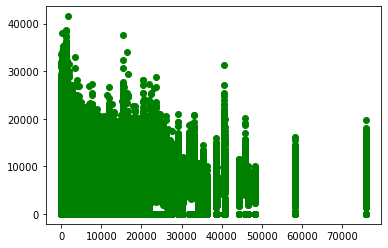

In [414]:
plt.plot(dfs["CompetitionDistance"], dfs["Sales"], 'o', color='green');

<p>Above graph shows that more is sales when the competition distance is less and vice verse.</p>

### E.)Plot an array of Pearson correlations between all features. Remember to do the merge operation between the dataframes store and train

In [415]:
corrMatrix = df.corr(method='pearson')

In [416]:
corrMatrix

,Store,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday
Store,1.000000,-0.026413,-0.050746,-0.004592,0.008488,0.009865,0.038928,-0.000008,0.005126,0.024325,-0.000047,0.000058,0.000641
CompetitionDistance,-0.026413,1.000000,-0.061624,0.025397,-0.139886,-0.054384,-0.109695,-0.000025,-0.019229,-0.102861,0.007992,0.000138,-0.003689
CompetitionOpenSinceMonth,-0.050746,-0.061624,1.000000,-0.060594,-0.009383,-0.036251,0.050326,0.000006,-0.028257,-0.030954,0.001384,-0.000023,-0.000526
CompetitionOpenSinceYear,-0.004592,0.025397,-0.060594,1.000000,-0.077336,-0.079784,0.012155,-0.000025,0.012659,0.008931,0.002771,0.000152,0.001520
Promo2,0.008488,-0.139886,-0.009383,-0.077336,1.000000,NaN,NaN,0.000168,-0.091040,-0.150159,-0.008309,-0.000983,-0.006909
Promo2SinceWeek,0.009865,-0.054384,-0.036251,-0.079784,NaN,1.000000,-0.244155,0.000174,0.059558,0.040531,-0.002430,-0.001008,-0.003133
Promo2SinceYear,0.038928,-0.109695,0.050326,0.012155,NaN,-0.244155,1.000000,0.000049,-0.021127,0.028974,0.001637,-0.000283,-0.003682
DayOfWeek,-0.000008,-0.000025,0.000006,-0.000025,0.000168,0.000174,0.000049,1.000000,-0.462125,-0.386445,-0.528963,-0.392925,-0.205388
Sales,0.005126,-0.019229,-0.028257,0.012659,-0.091040,0.059558,-0.021127,-0.462125,1.000000,0.894711,0.678472,0.452345,0.085124
Customers,0.024325,-0.102861,-0.030954,0.008931,-0.150159,0.040531,0.028974,-0.386445,0.894711,1.000000,0.616768,0.316169,0.071568


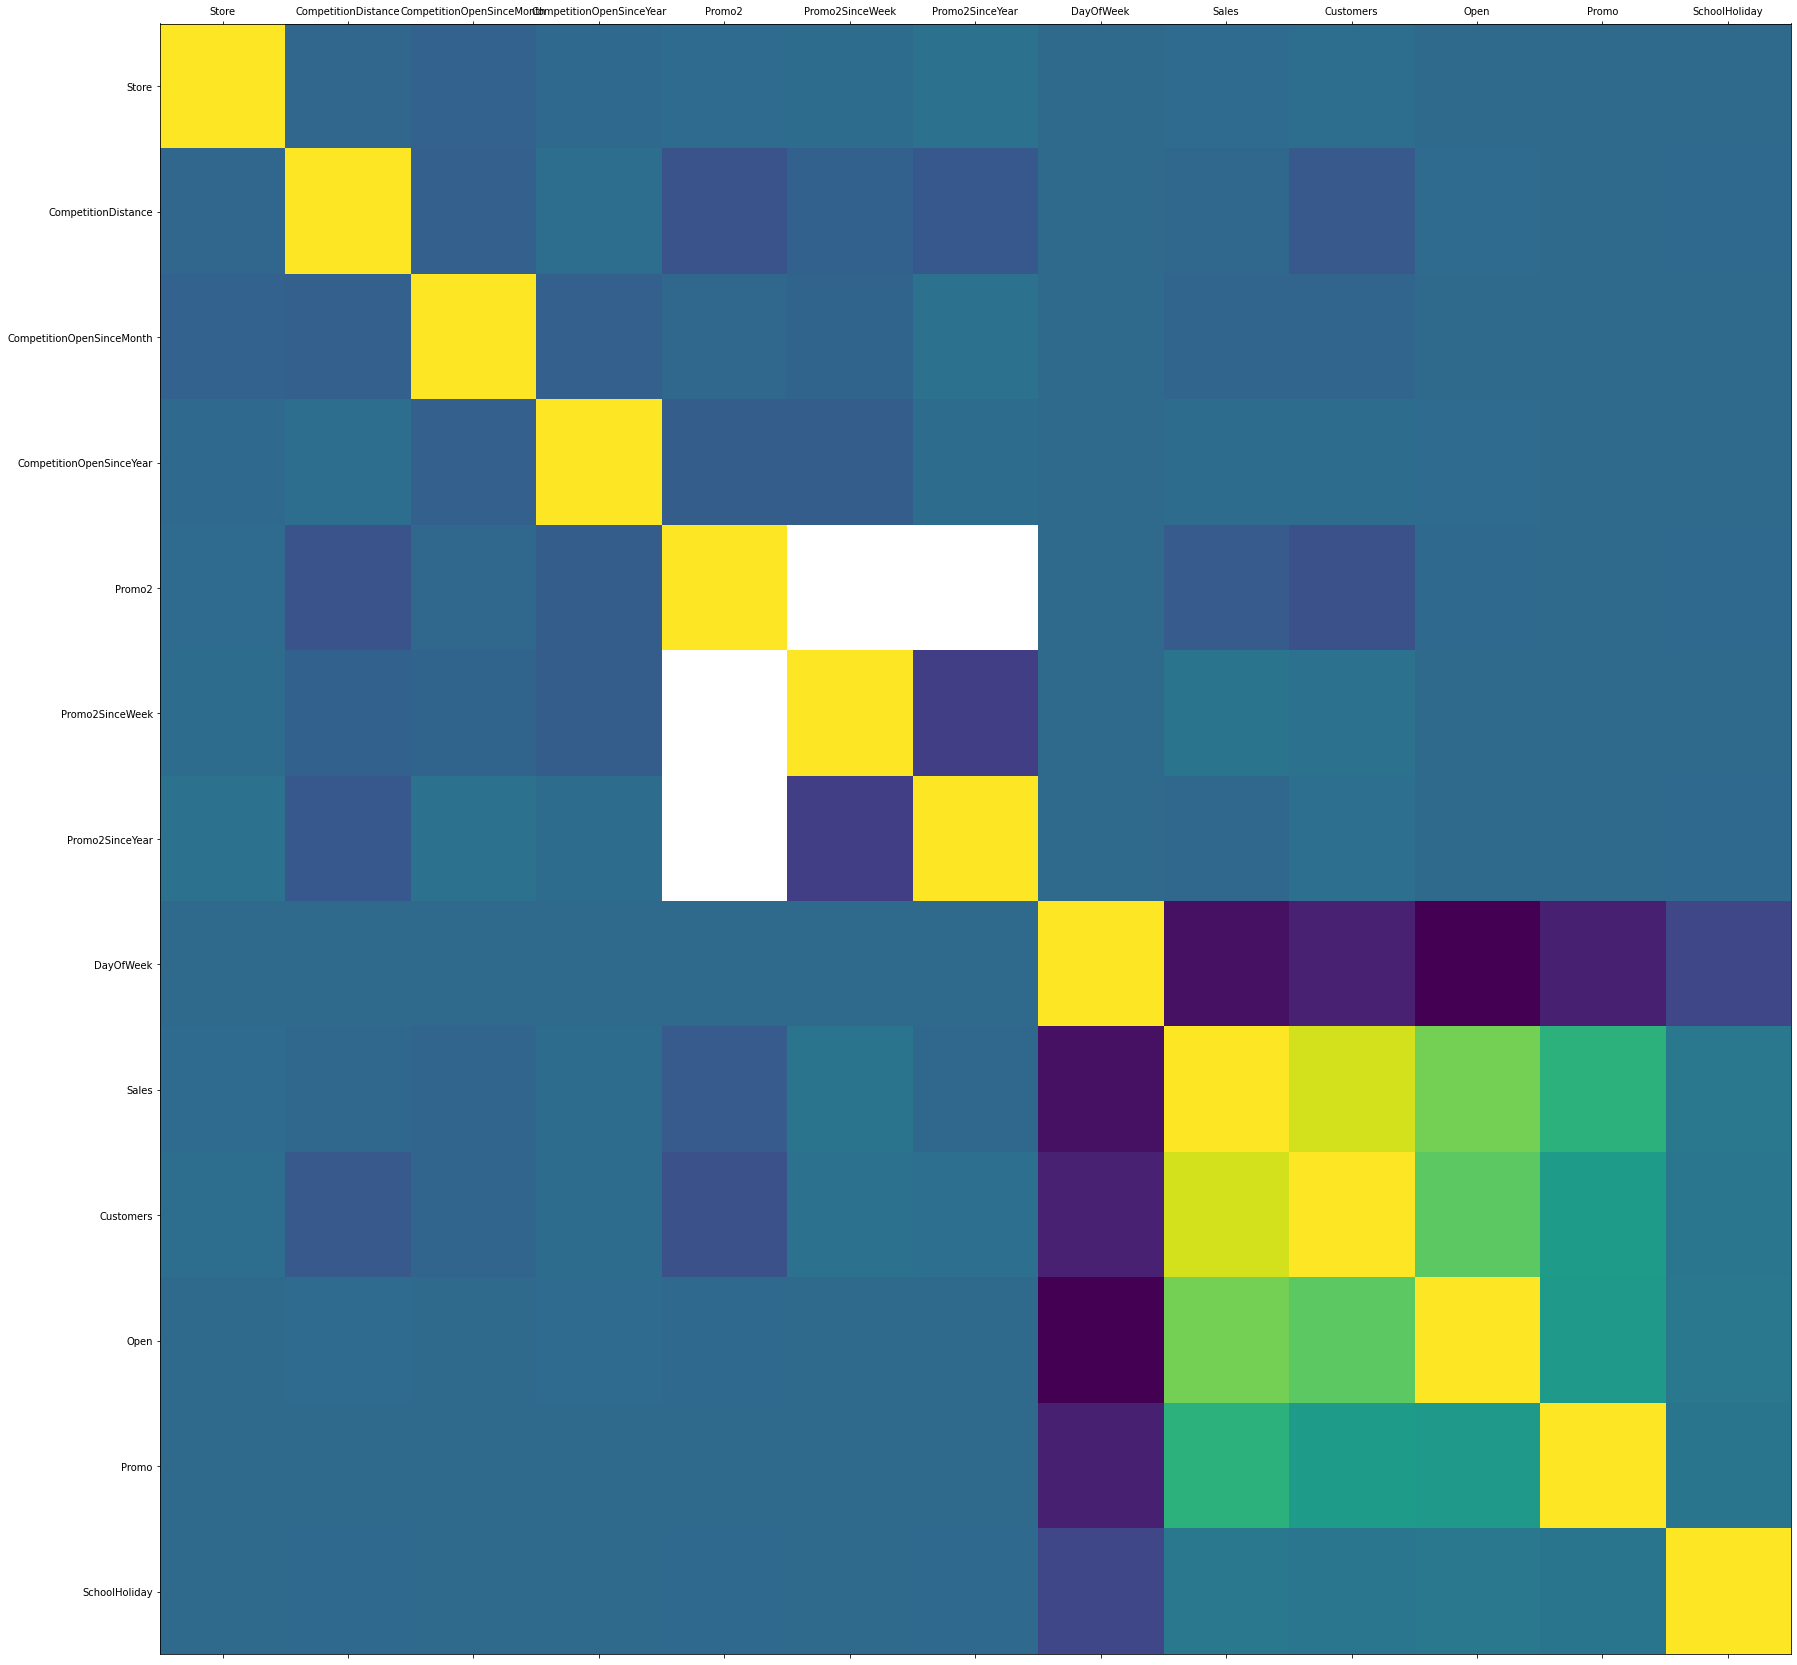

In [418]:
corr = df.corr()
fig, ax = plt.subplots(figsize=(30, 30))
ax.matshow(corr)
plt.xticks(range(len(corr.columns)), corr.columns);
plt.yticks(range(len(corr.columns)), corr.columns);


### F.)For the first 10 stores (id’ed) draw boxplots of their sales?

In [424]:
plts_dss = train_df[(train_df["Store"] >= 1) & (train_df["Store"] <=10 )] # get first 10 store rows

In [429]:
#get sales values of each store from 1 to 10 and make dataframe of all sales
store_sale1 =  train_df[train_df["Store"]==1]["Sales"].values
store_sale2 =  train_df[train_df["Store"]==2]["Sales"].values
store_sale3 =  train_df[train_df["Store"]==3]["Sales"].values
store_sale4 =  train_df[train_df["Store"]==4]["Sales"].values
store_sale5 =  train_df[train_df["Store"]==5]["Sales"].values
store_sale6 =  train_df[train_df["Store"]==6]["Sales"].values
store_sale7 =  train_df[train_df["Store"]==7]["Sales"].values
store_sale8 =  train_df[train_df["Store"]==8]["Sales"].values
store_sale9 =  train_df[train_df["Store"]==9]["Sales"].values
store_sale10 =  train_df[train_df["Store"]==10]["Sales"].values


# pd.DataFrame([store_sale1.values, store_sale2.values])
all_sales = pd.DataFrame([store_sale1,store_sale2,store_sale3,store_sale4,store_sale5,store_sale6,store_sale7,store_sale8,store_sale9,store_sale10])
all_sales_final = all_sales.T

In [430]:
all_sales_final.columns = ['1', '2','3','4','5','6','7','8','9','10' ] # Rename dataframe coloumns to show Store Number

In [431]:
all_sales_final

,1,2,3,4,5,6,7,8,9,10
0,5263,6064,8314,13995,4822,5651,15344,8492,8565,7185
1,5020,5567,8977,10387,4943,4790,11560,8420,7539,6186
2,4782,6402,7610,10514,5899,5275,12074,7029,7776,5524
3,5011,5671,8864,10275,6083,4839,12342,6717,8751,6140
4,6102,6627,8107,11812,7059,5723,14869,8739,10649,7212
...,...,...,...,...,...,...,...,...,...,...
937,4997,2342,4523,10338,1590,3872,5218,2337,4254,4256
938,4486,4484,6069,8290,4456,6092,7758,4059,4798,5114
939,4327,4159,5902,8247,3465,5398,7231,4842,4602,4675
940,5530,4422,6823,9941,4253,6089,8244,5419,4903,4812


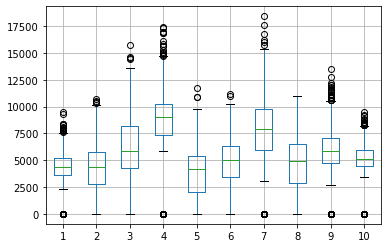

In [432]:
all_sales_final.boxplot(column=['1', '2','3','4','5','6','7','8','9','10']) #plot boxplot


### G.) Store has the maximum median sales value

<p>Above box plot shows that store with id 4 has maximum median sales values</p>